Package Installation

In [ ]:
!pip install ucimlrepo

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats.mstats import winsorize

Loading the dataset


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
seoul_bike_sharing_demand = fetch_ucirepo(id=560)

# data (as pandas dataframes)
X = seoul_bike_sharing_demand.data.features
y = seoul_bike_sharing_demand.data.targets

# metadata
print("Metadata of the dataset: ")
print(seoul_bike_sharing_demand.metadata)

# variable information
print("\nVariable information: ")
print(seoul_bike_sharing_demand.variables)

Metadata of the dataset: 
{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the r

In [ ]:
df=pd.DataFrame(X)
df['Functioning Day']=y

adf=df
print(df)

            Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0      1/12/2017                254     0         -5.2        37         2.2   
1      1/12/2017                204     1         -5.5        38         0.8   
2      1/12/2017                173     2         -6.0        39         1.0   
3      1/12/2017                107     3         -6.2        40         0.9   
4      1/12/2017                 78     4         -6.0        36         2.3   
...          ...                ...   ...          ...       ...         ...   
8755  30/11/2018               1003    19          4.2        34         2.6   
8756  30/11/2018                764    20          3.4        37         2.3   
8757  30/11/2018                694    21          2.6        39         0.3   
8758  30/11/2018                712    22          2.1        41         1.0   
8759  30/11/2018                584    23          1.9        43         1.3   

      Visibility  Dew point temperature

Total number of elements in the dataset

In [ ]:
df.size

122640

Shape of the dataset

In [ ]:
df.shape

(8760, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.duplicated().value_counts()  # checking for duplicates

,count
False,8760


In [ ]:
df.isnull().sum() # checking for missing values

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature,0
Humidity,0
Wind speed,0
Visibility,0
Dew point temperature,0
Solar Radiation,0
Rainfall,0


Extracting columns with int, float datatype for scatter plot

In [ ]:
numerical_col=list(adf.select_dtypes(exclude='object').columns)
print(numerical_col)

['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall']


Plotting scatter plot for each numerical feature column against the target column

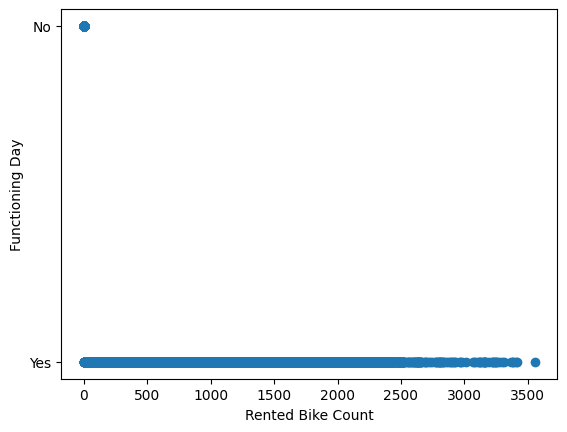

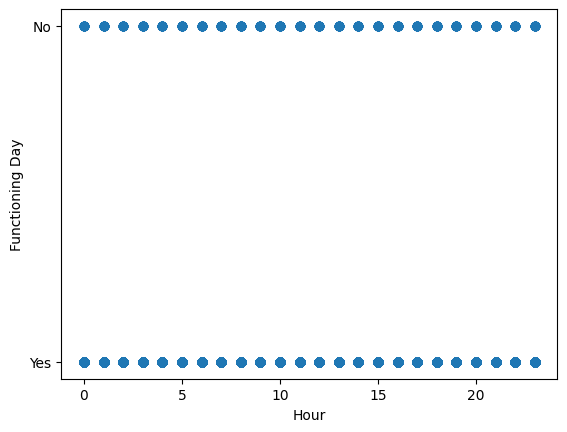

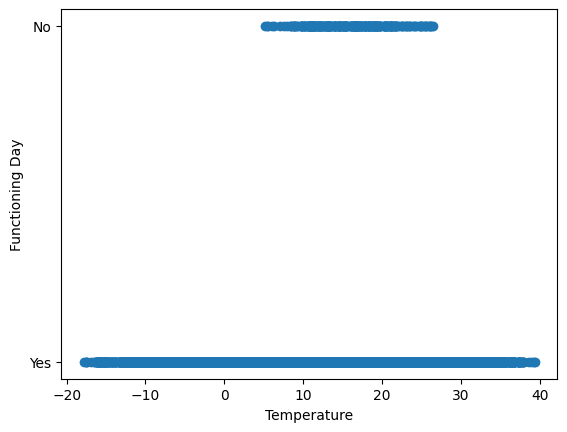

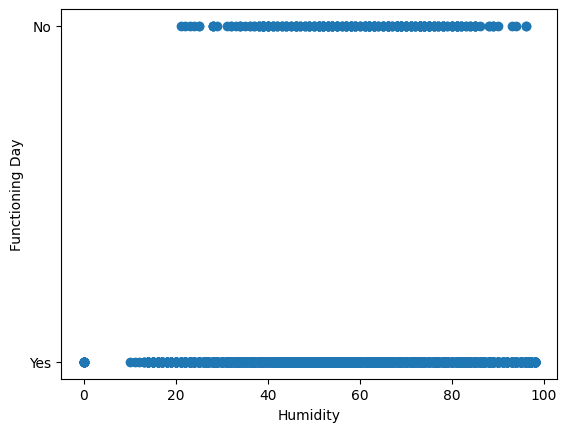

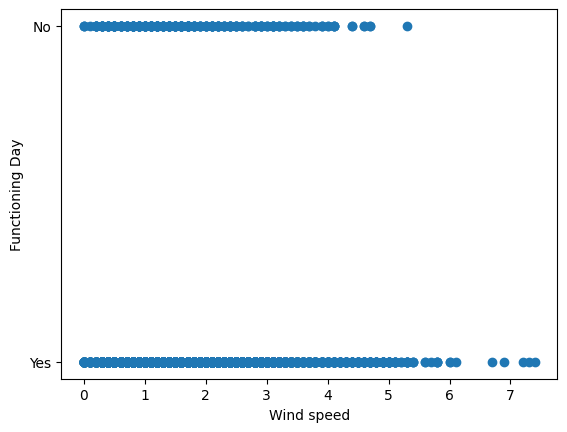

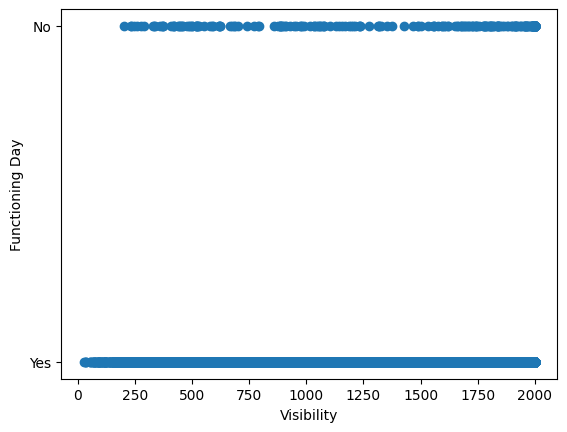

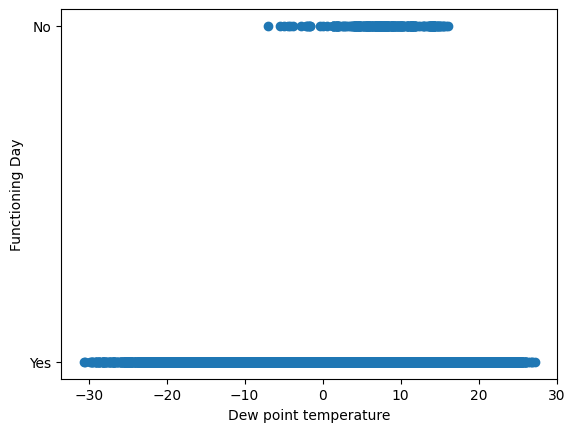

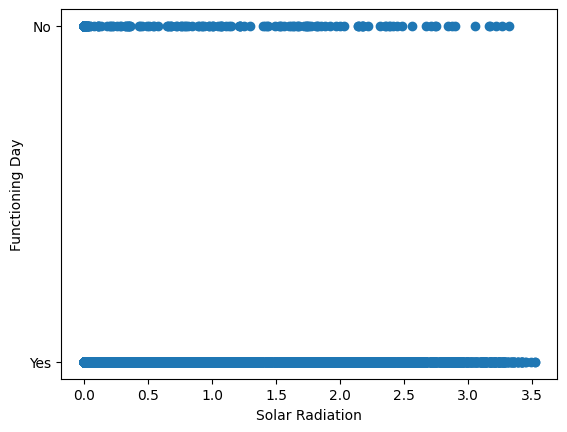

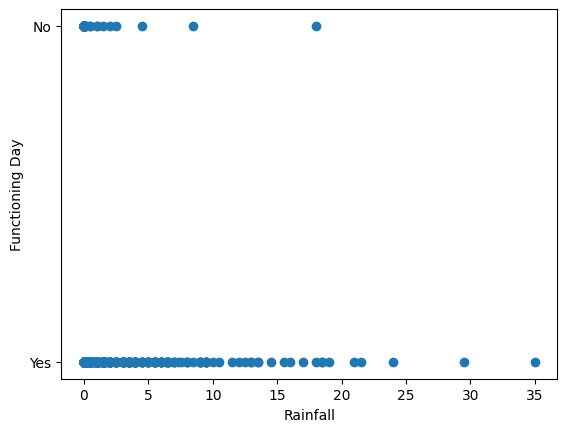

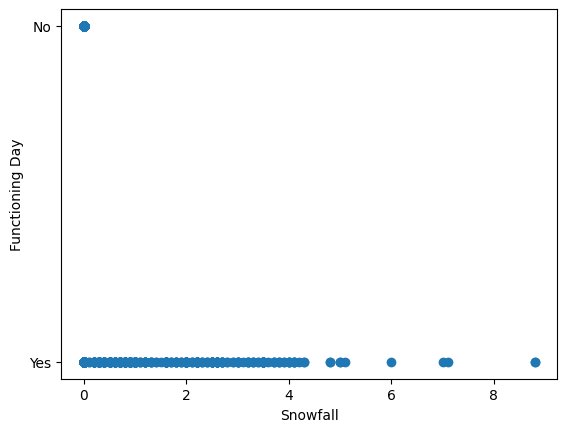

In [ ]:
target_col='Functioning Day'
for col in numerical_col:
  plt.scatter(adf[col],adf[target_col])
  plt.xlabel(col)
  plt.ylabel(target_col)
  plt.show()
  print()

Boxplot before handling of outliers

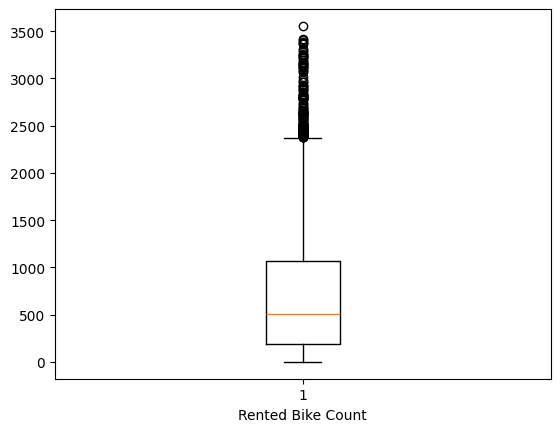

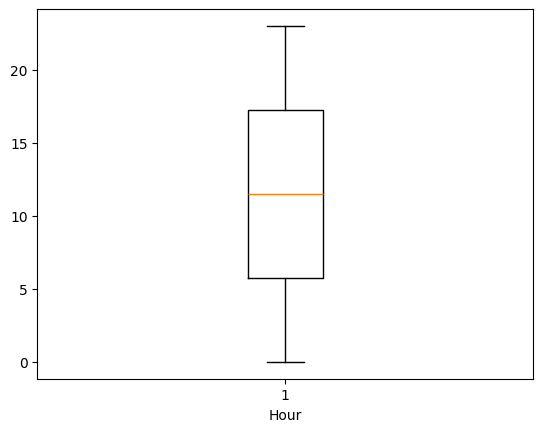

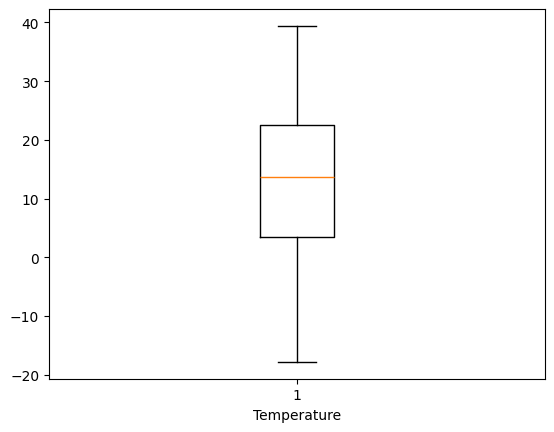

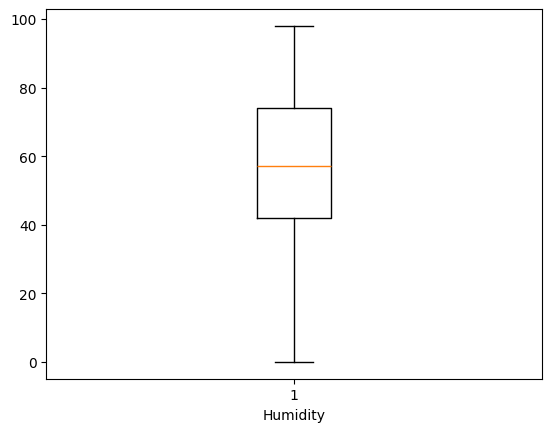

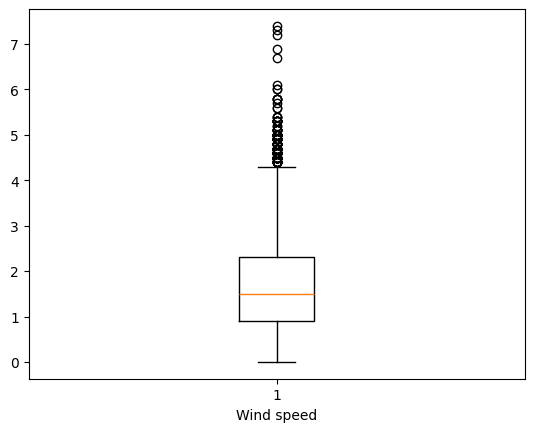

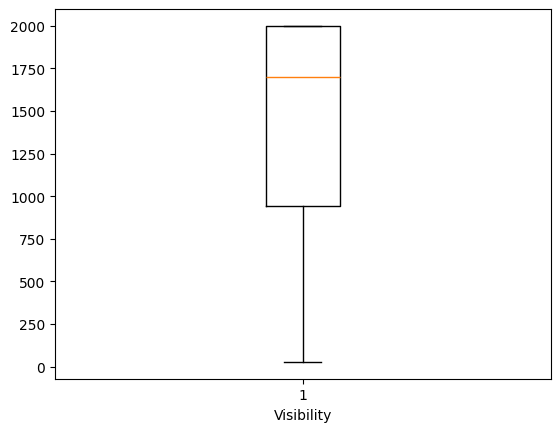

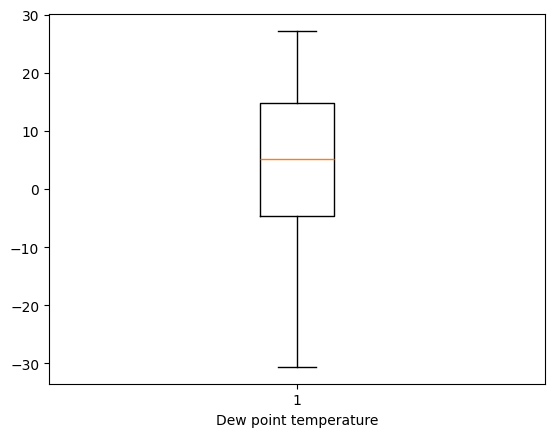

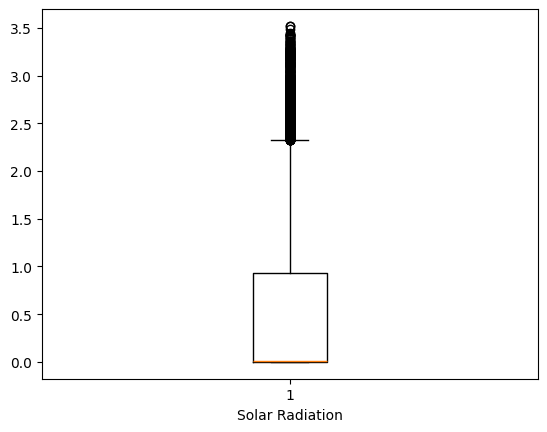

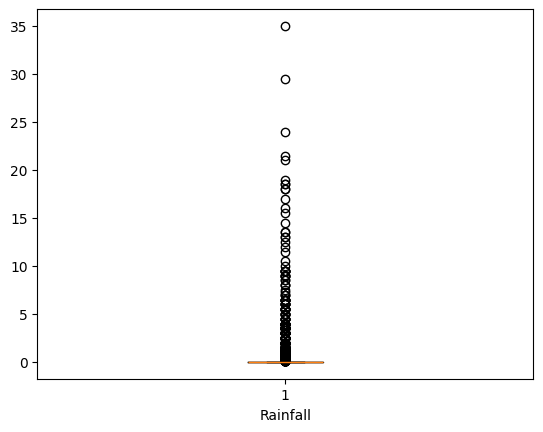

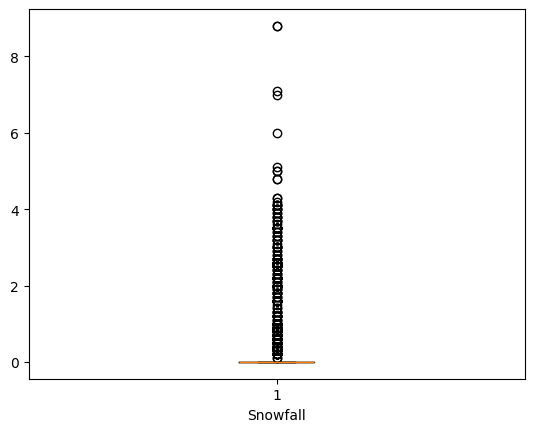

In [ ]:
for col in numerical_col:
  plt.boxplot(adf[col])
  plt.xlabel(f"{col}")
  plt.show()
  print()

Handling of outliers

In [ ]:
for col in numerical_col:
    print(f"Processing column: {col}")

    # Apply winsorization
    winsorized_data = winsorize(adf[col], limits=[0.05, 0.05])  # Capping at 5% from both ends

    # Replace the column with winsorized data
    adf[col] = winsorized_data

Processing column: Rented Bike Count
Processing column: Hour
Processing column: Temperature
Processing column: Humidity
Processing column: Wind speed
Processing column: Visibility
Processing column: Dew point temperature
Processing column: Solar Radiation
Processing column: Rainfall
Processing column: Snowfall


Boxplot after handling of outliers

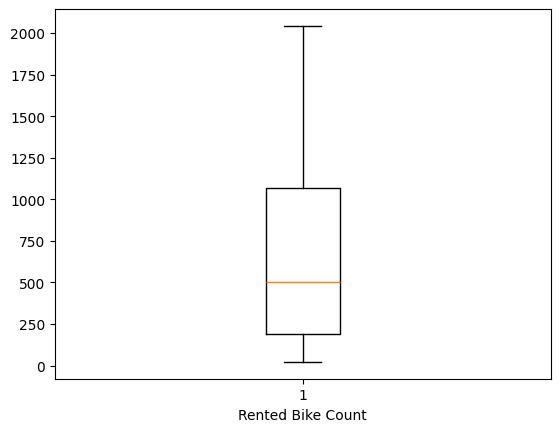

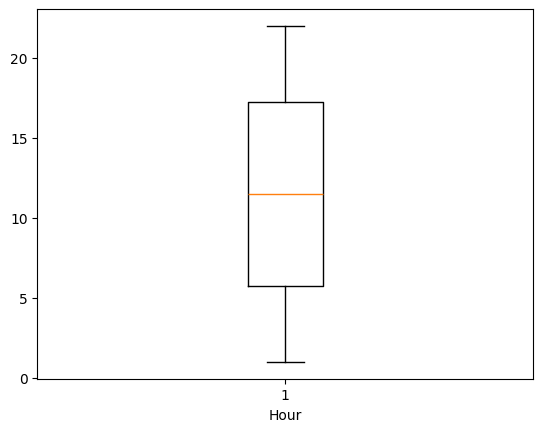

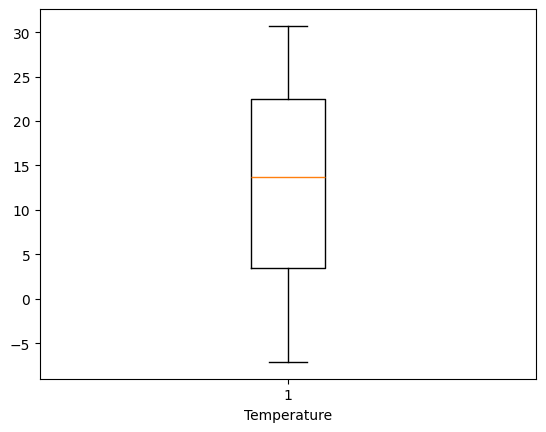

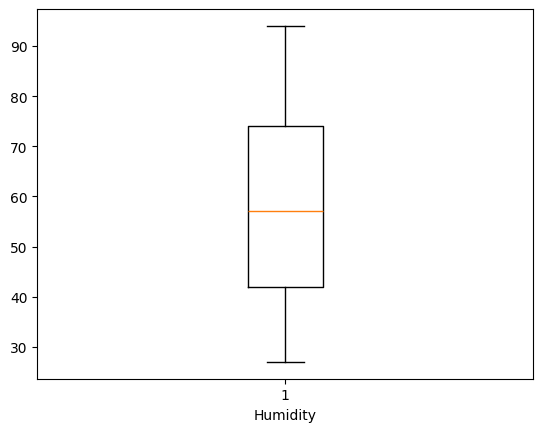

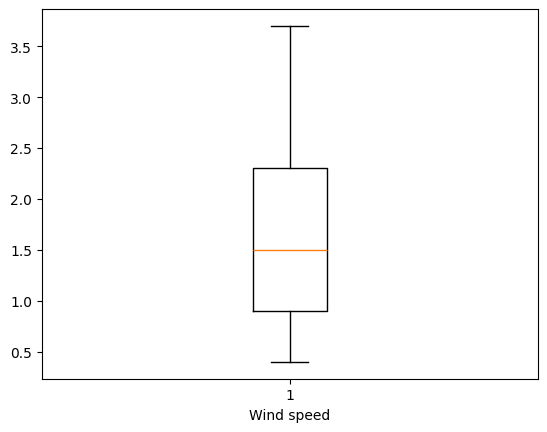

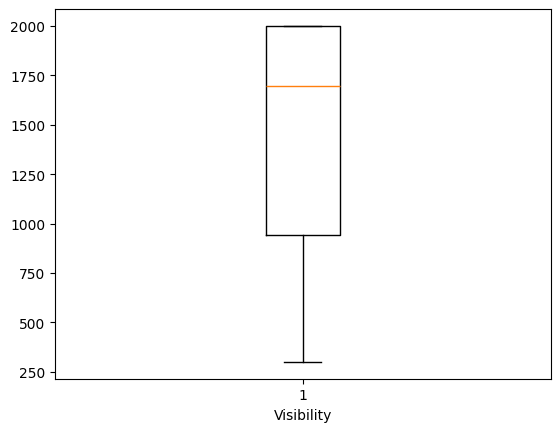

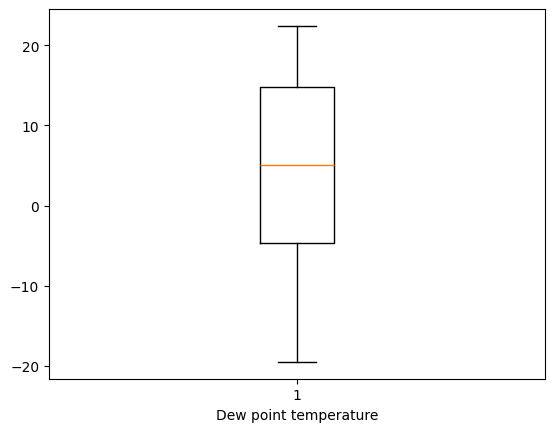

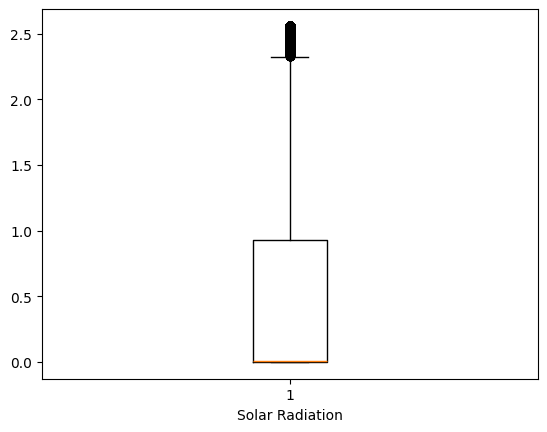

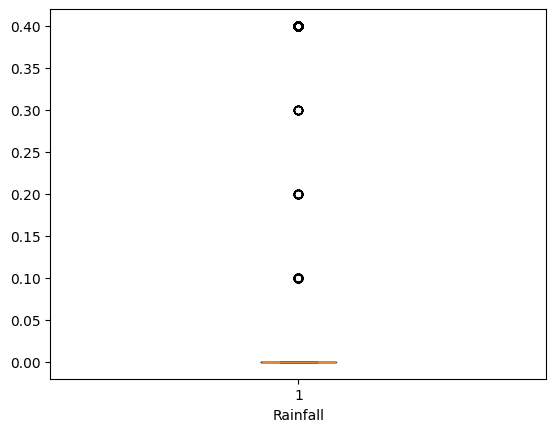

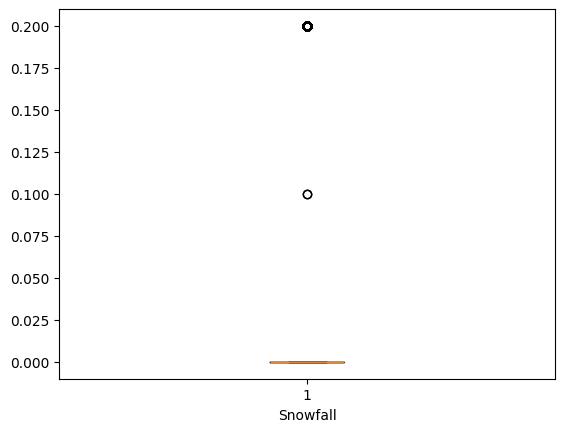

In [ ]:
for col in numerical_col:
  plt.boxplot(adf[col])
  plt.xlabel(f"{col}")
  plt.show()
  print()

Plotting different types of graphs for numerical features

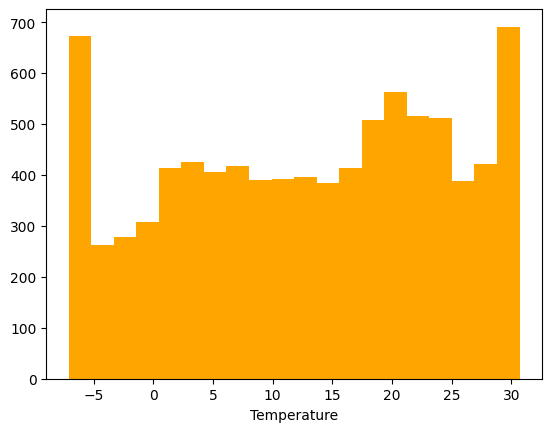

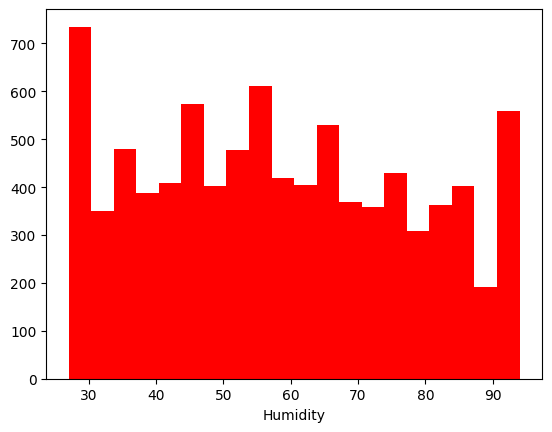

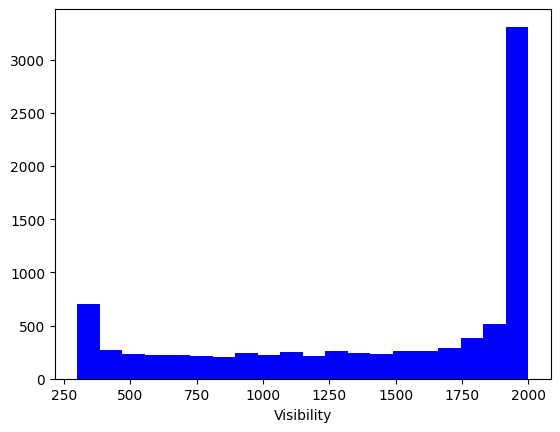

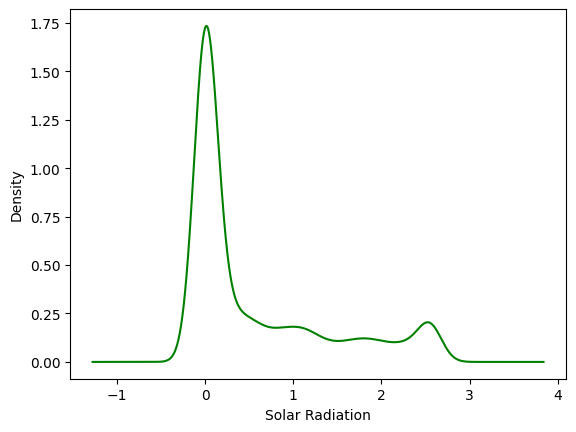

In [ ]:
acol=adf.columns
plt.hist(adf['Temperature'],bins=20,color='orange')
plt.xlabel('Temperature')
plt.show()
print()
plt.hist(adf['Humidity'],bins=20,color='red')
plt.xlabel('Humidity')
plt.show()
print()
plt.hist(adf['Visibility'],bins=20,color='blue')
plt.xlabel('Visibility')
plt.show()
print()
adf['Solar Radiation'].plot(kind='density',color='green')
plt.xlabel('Solar Radiation')
plt.show()

In [ ]:
col_order=df.columns  # storing the order of columns of original dataset
print(col_order)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day'],
      dtype='object')


Plotting graphs for categorical features

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64


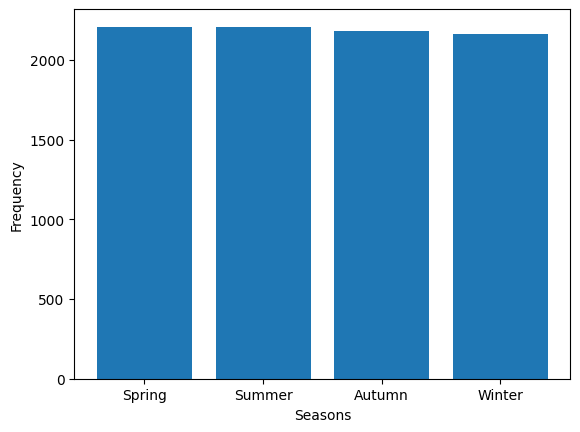

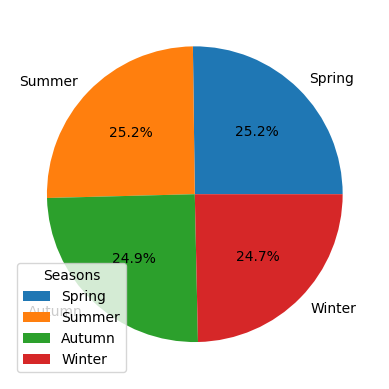

In [ ]:
print(df["Seasons"].value_counts())   # plotting bar graph of Seasons column
plt.bar(df['Seasons'].value_counts().index,df['Seasons'].value_counts())
plt.xlabel("Seasons")
plt.ylabel("Frequency")
plt.show()

print()
mylab=adf['Seasons'].value_counts().index
plt.pie(adf['Seasons'].value_counts(),labels=mylab,autopct='%1.1f%%')
plt.legend(title='Seasons')
plt.show()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64


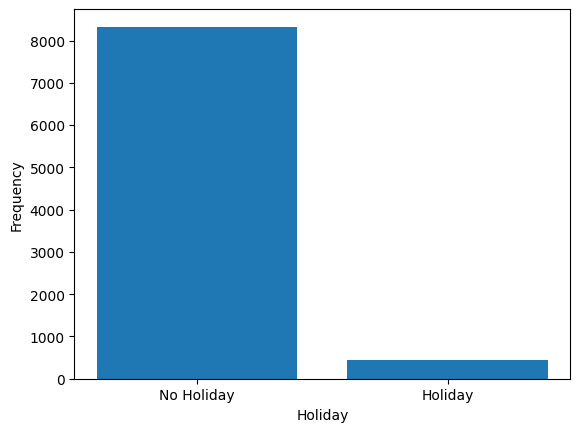

In [ ]:
print(df["Holiday"].value_counts())
plt.bar(df['Holiday'].value_counts().index,df['Holiday'].value_counts())
plt.xlabel("Holiday")
plt.ylabel("Frequency")
plt.show()

Normalization of numerical values

In [ ]:
numdf=df.select_dtypes(exclude='object')  # normalizing numerical data and storing it in numdf
scaler=MinMaxScaler()
numdf=pd.DataFrame(scaler.fit_transform(numdf),columns=df.select_dtypes(exclude='object').columns)
dupdf=numdf
print(dupdf)

      Rented Bike Count      Hour  Temperature  Humidity  Wind speed  \
0              0.114795  0.000000     0.050265  0.149254    0.545455   
1              0.090054  0.000000     0.042328  0.164179    0.121212   
2              0.074715  0.047619     0.029101  0.179104    0.181818   
3              0.042058  0.095238     0.023810  0.194030    0.151515   
4              0.027709  0.142857     0.029101  0.134328    0.575758   
...                 ...       ...          ...       ...         ...   
8755           0.485403  0.857143     0.298942  0.104478    0.666667   
8756           0.367145  0.904762     0.277778  0.149254    0.575758   
8757           0.332509  0.952381     0.256614  0.179104    0.000000   
8758           0.341415  1.000000     0.243386  0.208955    0.181818   
8759           0.278080  1.000000     0.238095  0.238806    0.272727   

      Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  
0       1.000000               0.045346              0.0

Correlation Matrix and heatmap


                       Rented Bike Count      Hour  Temperature  Humidity  \
Rented Bike Count               1.000000  0.422995     0.560598 -0.207228   
Hour                            0.422995  1.000000     0.120947 -0.251100   
Temperature                     0.560598  0.120947     1.000000  0.162392   
Humidity                       -0.207228 -0.251100     0.162392  1.000000   
Wind speed                      0.133943  0.299876    -0.023927 -0.343888   
Visibility                      0.199369  0.099910     0.040186 -0.542245   
Dew point temperature           0.390363  0.002066     0.913223  0.532416   
Solar Radiation                 0.282441  0.152041     0.344181 -0.469285   
Rainfall                       -0.219393 -0.017014     0.077183  0.396048   
Snowfall                       -0.193838 -0.031902    -0.317038  0.050255   

                       Wind speed  Visibility  Dew point temperature  \
Rented Bike Count        0.133943    0.199369               0.390363   
Hour    

<Axes: >

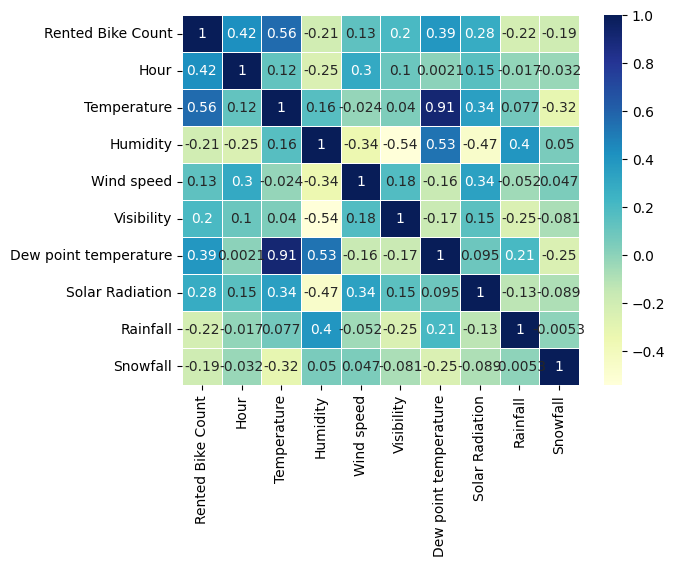

In [ ]:
data=dupdf.corr()    # calculating correlation matrix for normalized numerical data
print(data)

sns.heatmap(data,annot=True,cmap='YlGnBu',linewidth=0.5)  # plotting heatmap for the correlation matrix

In [ ]:
catcol=df.select_dtypes(include='object')  # choosing columns which are of object data type
catcol.columns

Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [ ]:
for c in catcol.columns:   # adding columns of object datatype to normalized dataset
  numdf[c]=df[c]
numdf

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Date,Seasons,Holiday,Functioning Day
0,0.114795,0.000000,0.050265,0.149254,0.545455,1.000000,0.045346,0.0,0.0,0.0,1/12/2017,Winter,No Holiday,Yes
1,0.090054,0.000000,0.042328,0.164179,0.121212,1.000000,0.045346,0.0,0.0,0.0,1/12/2017,Winter,No Holiday,Yes
2,0.074715,0.047619,0.029101,0.179104,0.181818,1.000000,0.042959,0.0,0.0,0.0,1/12/2017,Winter,No Holiday,Yes
3,0.042058,0.095238,0.023810,0.194030,0.151515,1.000000,0.045346,0.0,0.0,0.0,1/12/2017,Winter,No Holiday,Yes
4,0.027709,0.142857,0.029101,0.134328,0.575758,1.000000,0.021480,0.0,0.0,0.0,1/12/2017,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.485403,0.857143,0.298942,0.104478,0.666667,0.937647,0.219570,0.0,0.0,0.0,30/11/2018,Autumn,No Holiday,Yes
8756,0.367145,0.904762,0.277778,0.149254,0.575758,1.000000,0.229117,0.0,0.0,0.0,30/11/2018,Autumn,No Holiday,Yes
8757,0.332509,0.952381,0.256614,0.179104,0.000000,0.981176,0.229117,0.0,0.0,0.0,30/11/2018,Autumn,No Holiday,Yes
8758,0.341415,1.000000,0.243386,0.208955,0.181818,0.917059,0.231504,0.0,0.0,0.0,30/11/2018,Autumn,No Holiday,Yes


In [ ]:
normdf=numdf
df=normdf.reindex(columns=col_order)   # reordering the columns
print(df)

            Date  Rented Bike Count      Hour  Temperature  Humidity  \
0      1/12/2017           0.114795  0.000000     0.050265  0.149254   
1      1/12/2017           0.090054  0.000000     0.042328  0.164179   
2      1/12/2017           0.074715  0.047619     0.029101  0.179104   
3      1/12/2017           0.042058  0.095238     0.023810  0.194030   
4      1/12/2017           0.027709  0.142857     0.029101  0.134328   
...          ...                ...       ...          ...       ...   
8755  30/11/2018           0.485403  0.857143     0.298942  0.104478   
8756  30/11/2018           0.367145  0.904762     0.277778  0.149254   
8757  30/11/2018           0.332509  0.952381     0.256614  0.179104   
8758  30/11/2018           0.341415  1.000000     0.243386  0.208955   
8759  30/11/2018           0.278080  1.000000     0.238095  0.238806   

      Wind speed  Visibility  Dew point temperature  Solar Radiation  \
0       0.545455    1.000000               0.045346            

Label Encoding

In [ ]:
le=LabelEncoder()
for x in catcol.columns:
  df[x]=le.fit_transform(df[x])   # doing label encoding of columns with object datatype

print(df)

      Date  Rented Bike Count      Hour  Temperature  Humidity  Wind speed  \
0        3           0.114795  0.000000     0.050265  0.149254    0.545455   
1        3           0.090054  0.000000     0.042328  0.164179    0.121212   
2        3           0.074715  0.047619     0.029101  0.179104    0.181818   
3        3           0.042058  0.095238     0.023810  0.194030    0.151515   
4        3           0.027709  0.142857     0.029101  0.134328    0.575758   
...    ...                ...       ...          ...       ...         ...   
8755   284           0.485403  0.857143     0.298942  0.104478    0.666667   
8756   284           0.367145  0.904762     0.277778  0.149254    0.575758   
8757   284           0.332509  0.952381     0.256614  0.179104    0.000000   
8758   284           0.341415  1.000000     0.243386  0.208955    0.181818   
8759   284           0.278080  1.000000     0.238095  0.238806    0.272727   

      Visibility  Dew point temperature  Solar Radiation  Rainf

In [ ]:
print(df['Seasons'].value_counts())
print(df['Holiday'].value_counts())
print(df['Functioning Day'].value_counts())

Seasons
1    2208
2    2208
0    2184
3    2160
Name: count, dtype: int64
Holiday
1    8328
0     432
Name: count, dtype: int64
Functioning Day
1    8465
0     295
Name: count, dtype: int64


Variance calculation

In [ ]:
print(adf['Snowfall'].var())
print(adf['Rainfall'].var())
print(adf['Solar Radiation'].var())
print(adf['Dew point temperature'].var())
print(adf['Wind speed'].var())

0.001914365445899449
0.008028294836725503
0.671693524025704
159.6246738926328
0.8921112466968085


Correlation calculation

In [ ]:
print(adf['Snowfall'].corr(df['Functioning Day']))
print(adf['Rainfall'].corr(df['Functioning Day']))
print(adf['Solar Radiation'].corr(df['Functioning Day']))
print(adf['Dew point temperature'].corr(df['Functioning Day']))
print(adf['Wind speed'].corr(df['Functioning Day']))

0.043058416285827586
0.01612192165011875
-0.008155003943759452
-0.05329751580451498
0.005181179923223034


Dropping irrelevant columns

In [ ]:
df.drop(['Date','Dew point temperature', 'Solar Radiation', 'Snowfall','Wind speed'], axis=1, inplace=True)
print(df)

      Rented Bike Count      Hour  Temperature  Humidity  Visibility  \
0              0.114795  0.000000     0.050265  0.149254    1.000000   
1              0.090054  0.000000     0.042328  0.164179    1.000000   
2              0.074715  0.047619     0.029101  0.179104    1.000000   
3              0.042058  0.095238     0.023810  0.194030    1.000000   
4              0.027709  0.142857     0.029101  0.134328    1.000000   
...                 ...       ...          ...       ...         ...   
8755           0.485403  0.857143     0.298942  0.104478    0.937647   
8756           0.367145  0.904762     0.277778  0.149254    1.000000   
8757           0.332509  0.952381     0.256614  0.179104    0.981176   
8758           0.341415  1.000000     0.243386  0.208955    0.917059   
8759           0.278080  1.000000     0.238095  0.238806    0.946471   

      Rainfall  Seasons  Holiday  Functioning Day  
0          0.0        3        1                1  
1          0.0        3        

Divinding the dataset into features and target

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(X)
print('------------------------------------------------')
print(y)

      Rented Bike Count      Hour  Temperature  Humidity  Visibility  \
0              0.114795  0.000000     0.050265  0.149254    1.000000   
1              0.090054  0.000000     0.042328  0.164179    1.000000   
2              0.074715  0.047619     0.029101  0.179104    1.000000   
3              0.042058  0.095238     0.023810  0.194030    1.000000   
4              0.027709  0.142857     0.029101  0.134328    1.000000   
...                 ...       ...          ...       ...         ...   
8755           0.485403  0.857143     0.298942  0.104478    0.937647   
8756           0.367145  0.904762     0.277778  0.149254    1.000000   
8757           0.332509  0.952381     0.256614  0.179104    0.981176   
8758           0.341415  1.000000     0.243386  0.208955    0.917059   
8759           0.278080  1.000000     0.238095  0.238806    0.946471   

      Rainfall  Seasons  Holiday  
0          0.0        3        1  
1          0.0        3        1  
2          0.0        3       

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)   # dividing dataset into training and testing dataset
print(y_train.value_counts())
print(y_test.value_counts())

Functioning Day
1    6771
0     237
Name: count, dtype: int64
Functioning Day
1    1694
0      58
Name: count, dtype: int64


Training the model

In [ ]:
print('\nDECISION TREE CLASSIFIER')
dtc=DecisionTreeClassifier()
model=dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print()
feature_names = X.columns  # Replace X with your feature DataFrame
feature_importances = model.feature_importances_  # Output array
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")
print()
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Precision Score: ",precision_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("F1-Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred))


DECISION TREE CLASSIFIER

Rented Bike Count: 0.6388865897062621
Hour: 0.012394801956390913
Temperature: 0.014116452600086421
Humidity: 0.2570421187013215
Visibility: 0.0144830910927234
Rainfall: 0.012707317166488718
Seasons: 0.05036962877672685
Holiday: 0.0

Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1-Score:  1.0
Confusion Matrix: 
[[  58    0]
 [   0 1694]]
